# Lab 5 Connected Components Labelling
## Abdul Samad
## CMS: 286632

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def binarize(img, name, threshold):
    arr = np.asarray(img).copy()
    arr[arr < threshold] = 0    
    arr[arr >= threshold] = 255 
    imageArray = Image.fromarray(arr)
    
    #Save image in this naming format
    imageArray.save('binarized' + '-' + name + '.png')
#     imageArray

In [3]:
def neighbour_4(image):
    img = image.copy()
    
    label = [1]
    dependencies = {}

    first_component = 1
    for row in range(1,img.shape[0]-1):    
        for col in range(1,img.shape[1]-1):

            if (img[row][col] == 0):

                top_neighbour = img[row-1][col]
                left_neighbour = img[row][col-1]

                if(first_component == 1):
                    img[row][col] = label[0]
                    first_component = first_component+1


                elif((not left_neighbour in label) and (not top_neighbour in label)):
                    last_elm = label[-1]+1
                    label.append(last_elm)

                    img[row][col] = label[-1]

                elif((left_neighbour in label) and (not top_neighbour in label)):
                        img[row][col] = left_neighbour

                elif((not left_neighbour in label) and (top_neighbour in label)):
                        img[row][col] = top_neighbour

                elif((left_neighbour in label) and (top_neighbour in label) and left_neighbour == top_neighbour):

                        img[row][col] = top_neighbour

                else:
                    minimun = min(left_neighbour, top_neighbour)
                    dependent = max(left_neighbour, top_neighbour)
                    dependencies[dependent] = minimun
                    img[row][col] = minimun
            
    for item in reversed(dependencies):
        img = np.where(img == item, dependencies[item], img)
            
    return img

In [4]:
def neighbour_8(image):
    img = image.copy()
    
    label = [1]
    dependencies = {}

    first_component = 1
    
    # First Pass of Connected component graph
    for row in range(1,img.shape[0]-1):    
        for col in range(1,img.shape[1]-1):

            if (img[row][col] == 0):

                top_neighbour = img[row-1][col]
                left_neighbour = img[row][col-1]
                top_left_neighbour = img[row-1][col-1]

                if(first_component == 1):
                    img[row][col] = label[0]
                    first_component = first_component+1


                elif((not left_neighbour in label) and (not top_neighbour in label) and (not top_left_neighbour in label)):
                    last_elm = label[-1]+1
                    label.append(last_elm)

                    img[row][col] = label[-1]

                #top
                elif((not left_neighbour in label) and (top_neighbour in label) and (not top_left_neighbour in label)):
                        img[row][col] = top_neighbour
                
                #top_left
                elif((not left_neighbour in label) and (not top_neighbour in label) and (top_left_neighbour in label)):
                        img[row][col] = top_left_neighbour

                #left
                elif((left_neighbour in label) and (not top_neighbour in label) and (not top_left_neighbour in label)):
                        img[row][col] = left_neighbour
                
                
                
                
                #top_left and top
                elif((not left_neighbour in label) and (top_neighbour in label) and (top_left_neighbour in label)):
                        if(top_left_neighbour != top_neighbour):
                            minimun = min(top_left_neighbour, top_neighbour)
                            dependent = max(top_left_neighbour, top_neighbour)
                            dependencies[dependent] = minimun
                            img[row][col] = minimun
                            
                        else:
                            img[row][col] = top_neighbour
                            
                            
                #top_left and left
                elif((left_neighbour in label) and (not top_neighbour in label) and (top_left_neighbour in label)):
                        if(top_left_neighbour != left_neighbour):
                            minimun = min(top_left_neighbour, left_neighbour)
                            dependent = max(top_left_neighbour, left_neighbour)
                            dependencies[dependent] = minimun
                            img[row][col] = minimun
                            
                        else:
                            img[row][col] = left_neighbour
                
                
                
                #top and left
                elif((left_neighbour in label) and (top_neighbour in label) and (not top_left_neighbour in label)):
                        if(top_neighbour != left_neighbour):
                            minimun = min(top_neighbour, left_neighbour)
                            dependent = max(top_neighbour, left_neighbour)
                            dependencies[dependent] = minimun
                            img[row][col] = minimun
                            
                        else:
                            img[row][col] = left_neighbour
                
                
                elif((left_neighbour in label) and (top_neighbour in label) and left_neighbour == top_neighbour):

                        img[row][col] = top_neighbour

                else:
                    minimun = min(left_neighbour, top_neighbour, top_left_neighbour)
                    dependent = max(left_neighbour, top_neighbour, top_left_neighbour)
                    if (minimun != dependent):
                        
                        dependencies[dependent] = minimun
                        img[row][col] = minimun
                    else:
                        img[row][col] = minimun
     
    # Second Pass of Connected component graph
    for item in reversed(dependencies):
        img = np.where(img == item, dependencies[item], img)
            
    return img

## Read an image and convert into grayscale

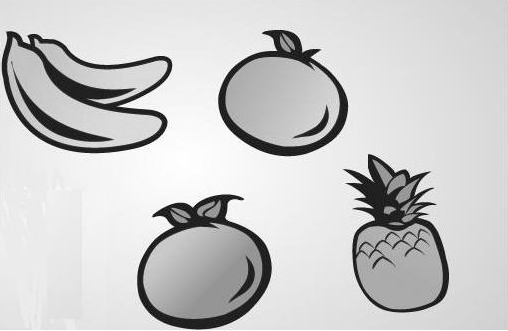

In [5]:
img = Image.open('Lab5-image.png').convert('L')
img

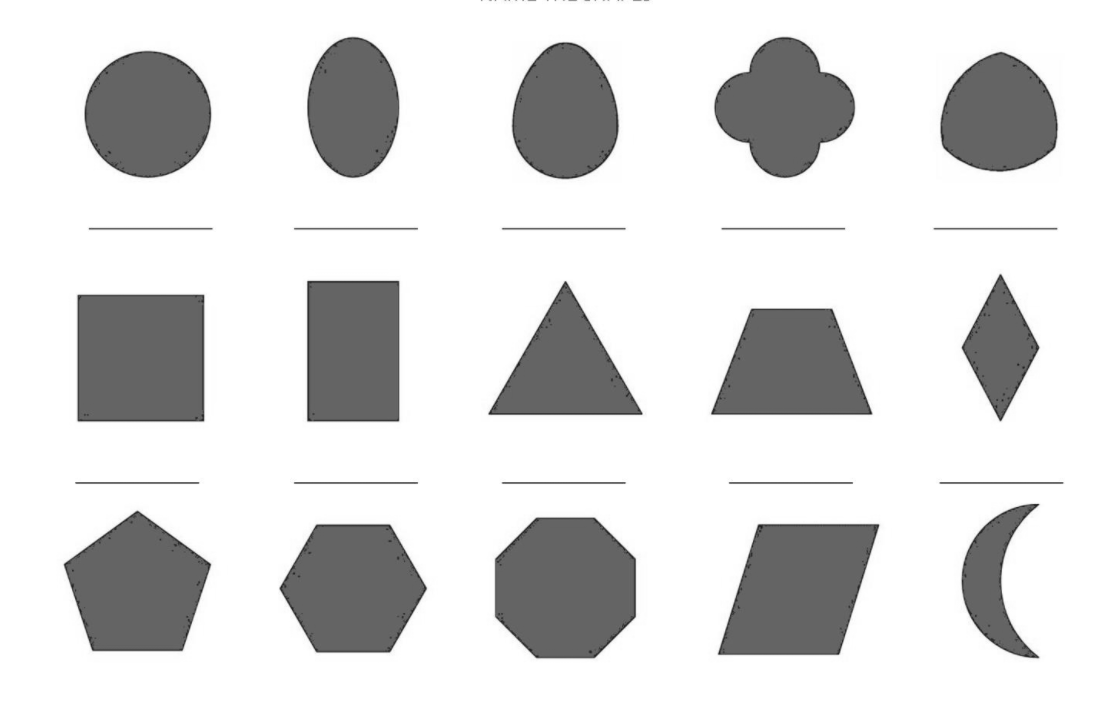

In [6]:
img_shapes = Image.open('shapes.png').convert('L')
img_shapes

### Binarized Images

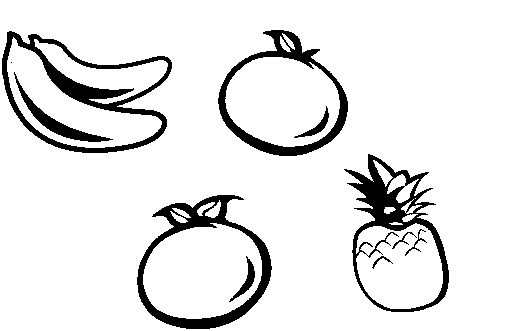

In [7]:
binarize(img, 'Lab5-image', threshold=100)
img_bin = Image.open("binarized-Lab5-image.png")
img_bin

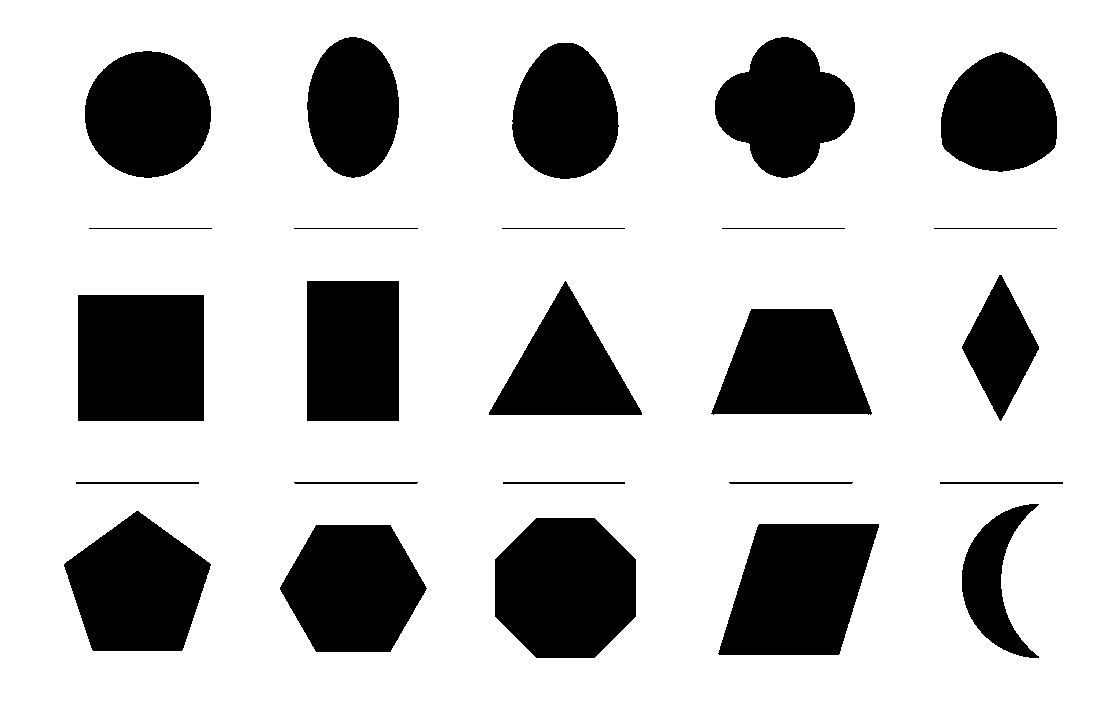

In [9]:
binarize(img_shapes, 'shapes', threshold=140)
img_shapes = Image.open("binarized-shapes.png")
img_shapes

In [10]:
img_bin = np.asarray(img_bin, dtype=np.uint16)
img_shapes = np.asarray(img_shapes, dtype=np.uint16)

In [11]:
img = np.pad(img_bin, (1,1), 'constant', constant_values=255)
img_shapes = np.pad(img_shapes, (1,1), 'constant', constant_values=255)

In [12]:
img = np.where(img == 255, 5000, img)
img_shapes = np.where(img_shapes == 255, 5000, img_shapes)

### Test Array

In [13]:
test_arr = np.array([[0,0,255,0,0,0,255,0],
          [0,0,255,0,255,0,255,0],
          [0,0,0,0,255,255,255,0],
          [255,255,255,255,255,255,255,0],
          [0,0,0,0,255,0,255,0],
          [255,255,255,0,255,0,255,0],
          [0,0,0,0,255,255,255,0],
          [0,0,0,0,255,0,0,0]], dtype=np.uint16)

test_arr = np.pad(test_arr, (1,1), 'constant', constant_values=255)
test_arr.shape

(10, 10)

In [14]:
# img = test_arr

In [15]:
# counter = 0
# for i in range(1, 256):
#     if(i in img):
#         occ = np.count_nonzero(img == i)
# #         if(occ > 900):
#         if(True):
#             counter = counter +1
#             print("Label: "+str(i))
#             print("Occur: "+str(occ))

#             print()

# print("Total: ", counter)

### 4 Neighbour

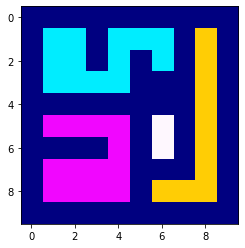

In [16]:
test_img = neighbour_4(test_arr)
test_img = np.where(test_img == 255, 0, test_img )

plt.imshow(test_img, cmap='gist_ncar')

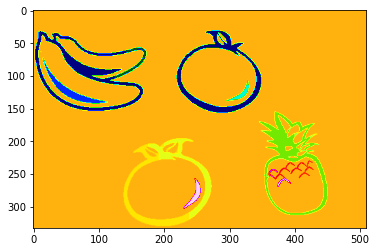

In [18]:
img_4 = neighbour_4(img)
img_4 = np.where(img_4 == 5000, 255, img_4 )
plt.imshow(img_4, cmap='gist_ncar')

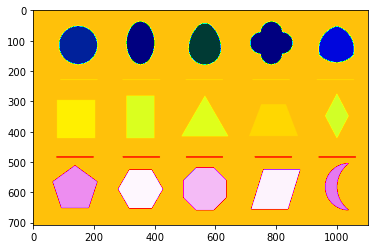

In [20]:
img_shapes_4 = neighbour_4(img_shapes)
img_shapes_4 = np.where(img_shapes_4 == 5000, 255, img_shapes_4 )
plt.imshow(img_shapes_4, cmap='gist_ncar')

### 8 Neighbour

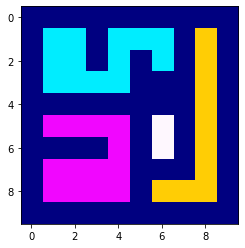

In [17]:
test_img_8 = neighbour_8(test_arr)
test_img_8 = np.where(test_img_8 == 255, 0, test_img_8 )
plt.imshow(test_img_8, cmap='gist_ncar')

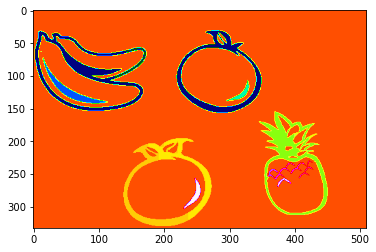

In [19]:
img_8 = neighbour_8(img)
img_8 = np.where(img_8 == 5000, 255, img_8 )
plt.imshow(img_8, cmap='gist_ncar')

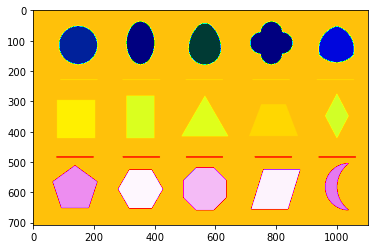

In [21]:
img_shapes_8 = neighbour_8(img_shapes)
img_shapes_8 = np.where(img_shapes_8 == 5000, 255, img_shapes_8 )
plt.imshow(img_shapes_8, cmap='gist_ncar')

In [22]:
test_img_8

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 1, 1, 1, 0, 3, 0],
       [0, 1, 1, 0, 1, 0, 1, 0, 3, 0],
       [0, 1, 1, 1, 1, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 4, 4, 4, 4, 0, 5, 0, 3, 0],
       [0, 0, 0, 0, 4, 0, 5, 0, 3, 0],
       [0, 4, 4, 4, 4, 0, 0, 0, 3, 0],
       [0, 4, 4, 4, 4, 0, 3, 3, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint16)